/tmp/ipykernel_7823/2758275552.py:24: RuntimeWarning: overflow encountered in ubyte_scalars
  fn2 = lambda x,y: (image[x-1][y] + image[x][y-1] + image[x+1][y] + image[x][y+1])/4


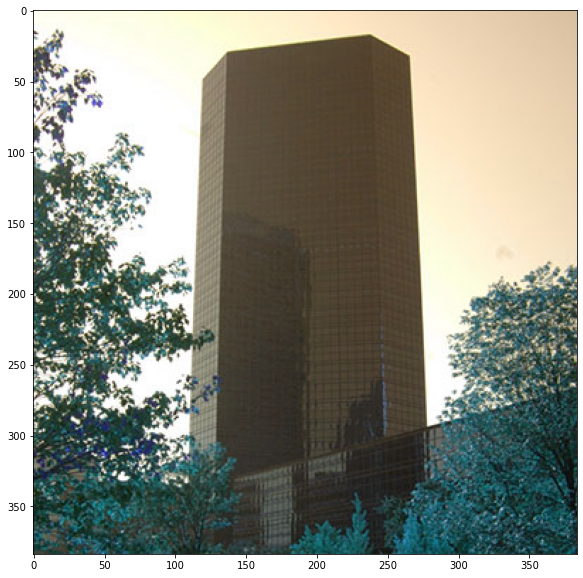

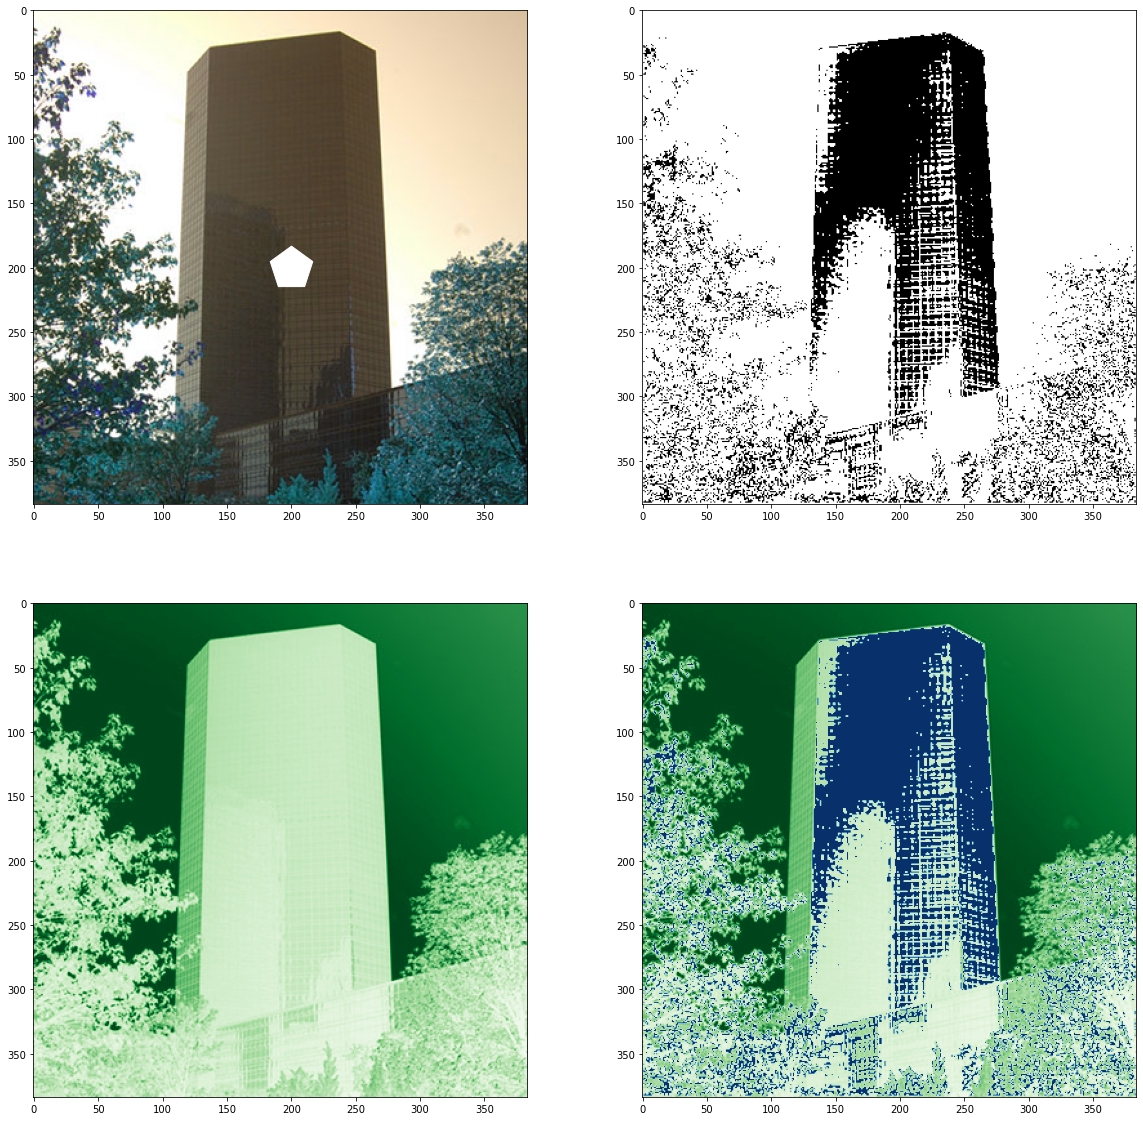

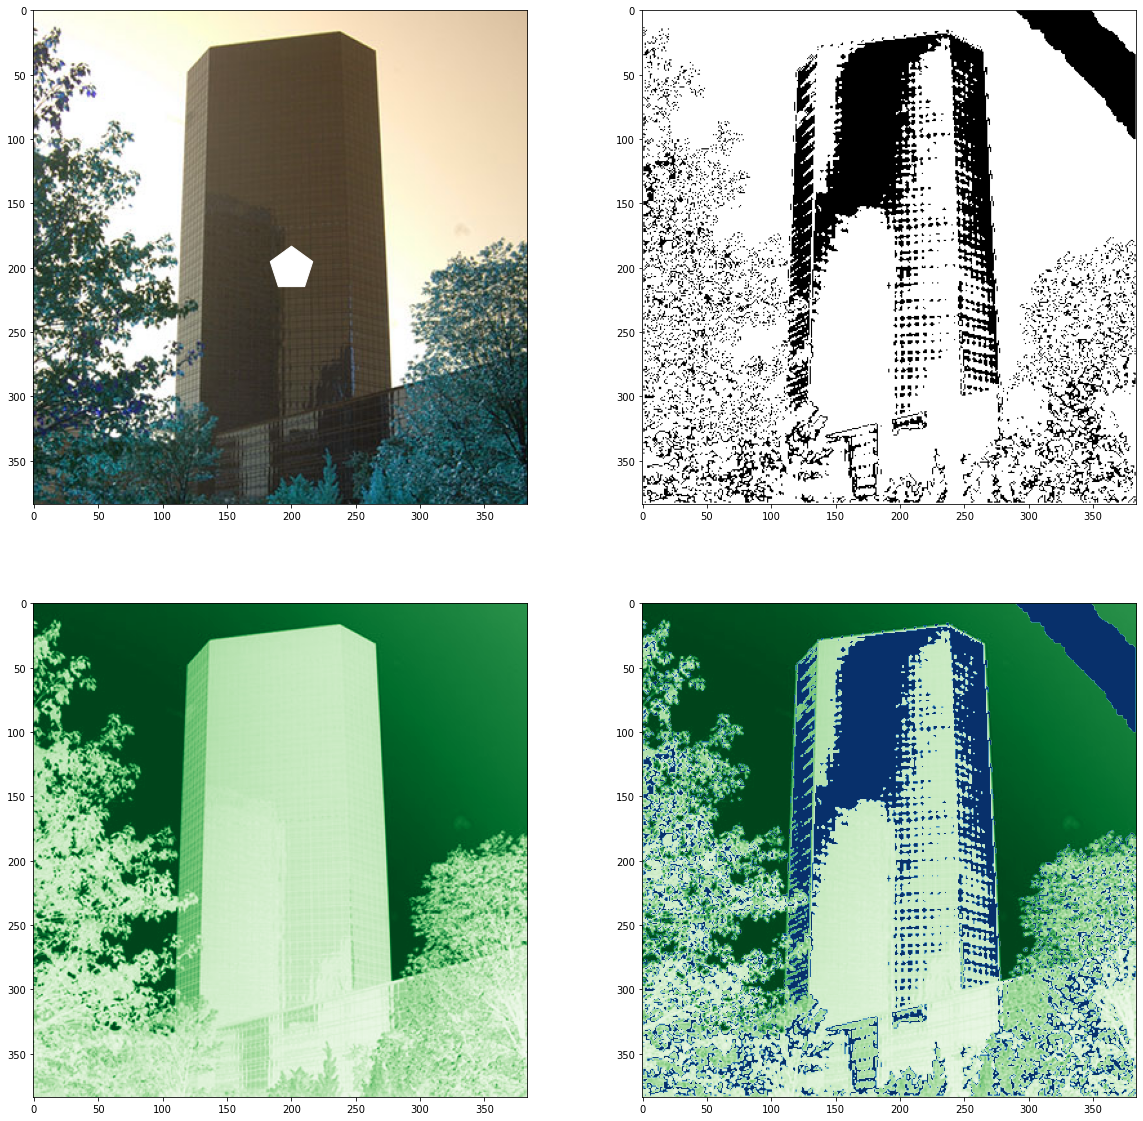

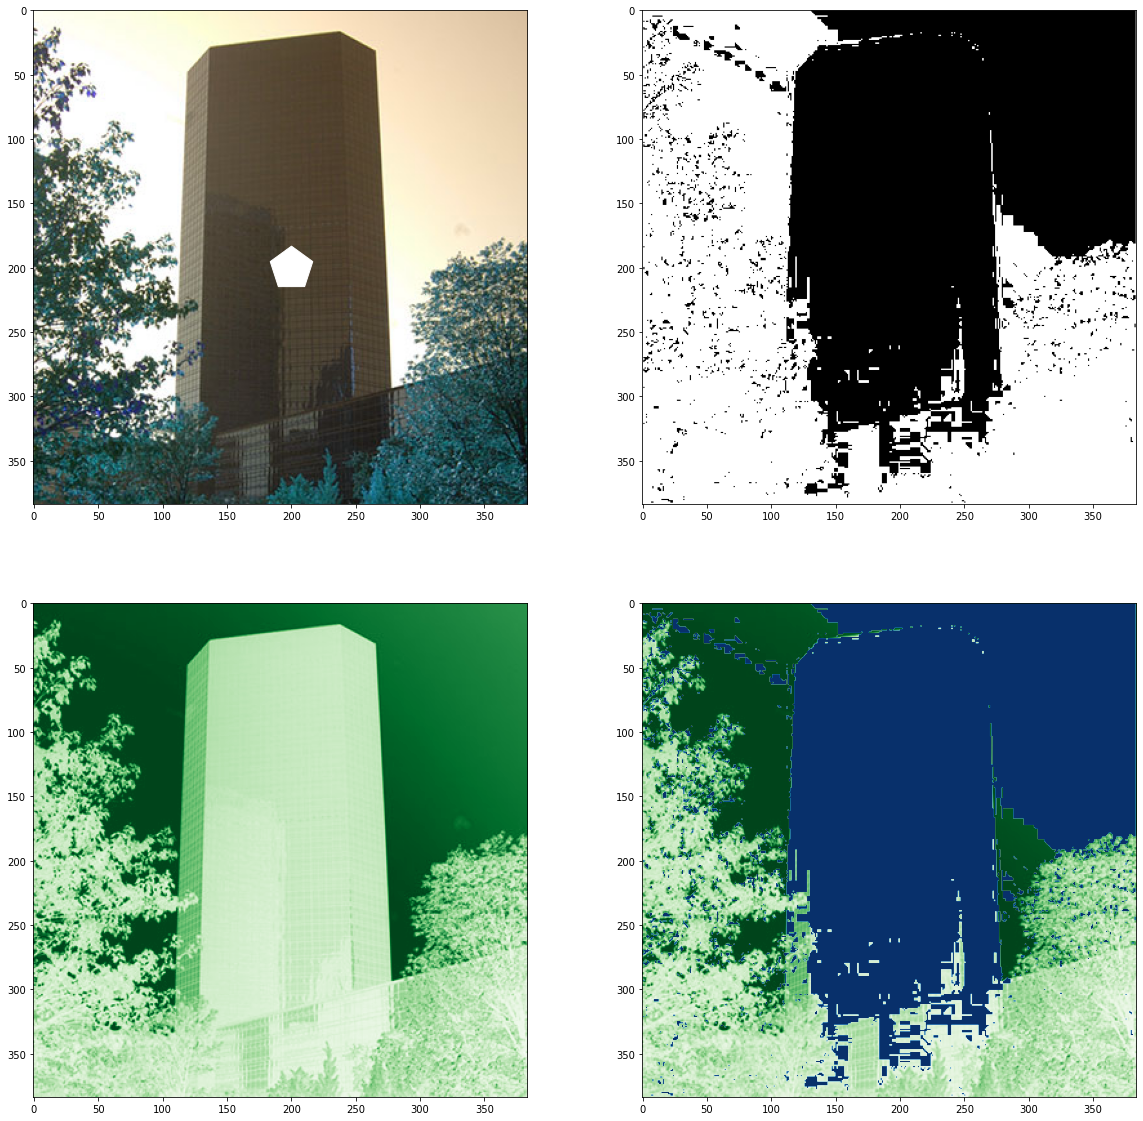

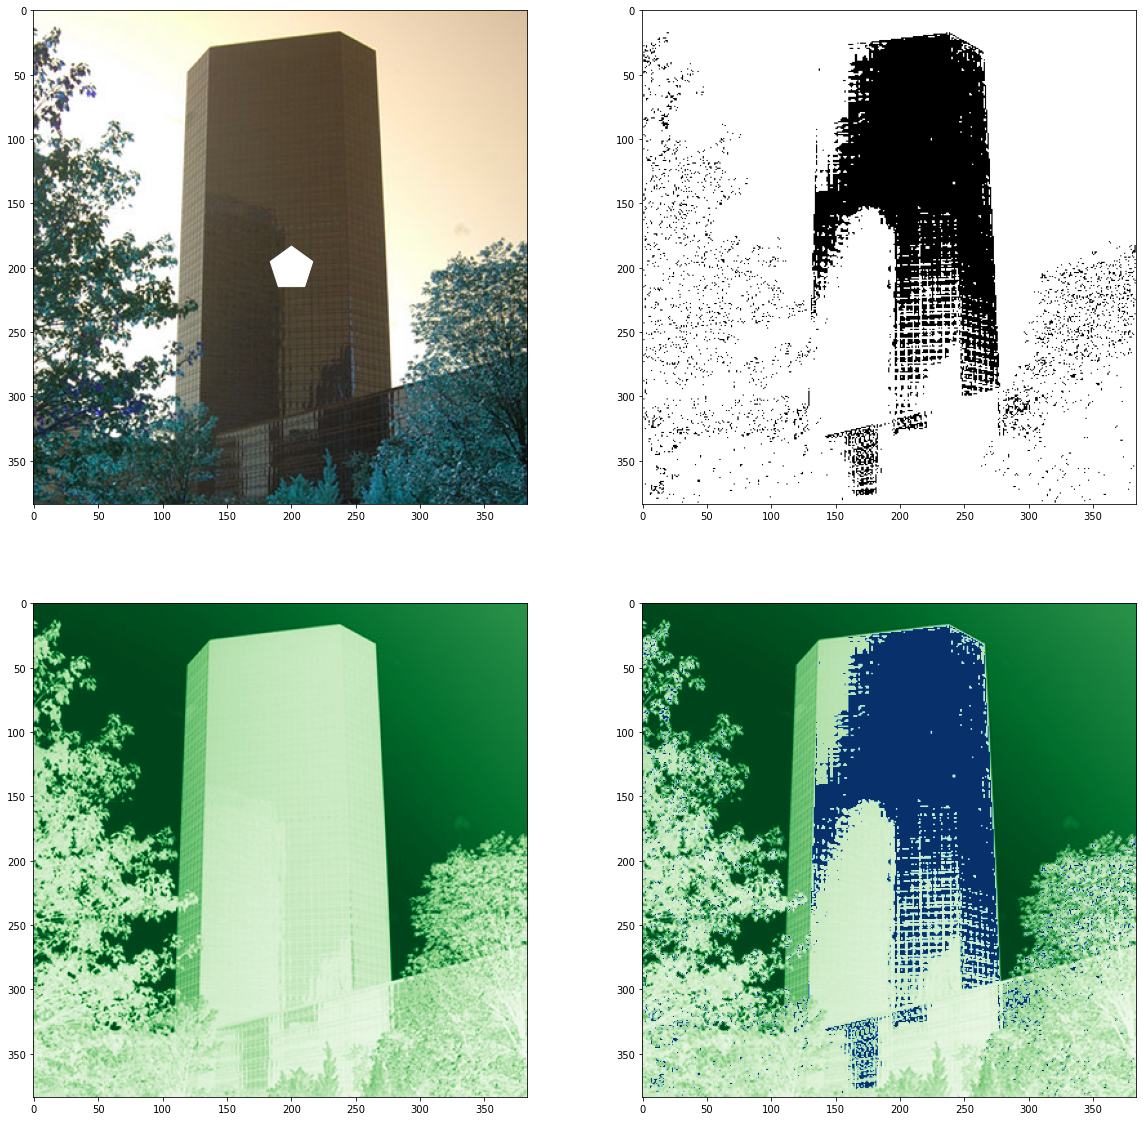

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


image = cv2.imread("proj.jpg",cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("proj.jpg",cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(10,10))
plt.imshow(image2)

def Norm_l1(vector1,vector2): 
    norm = np.abs(vector1-vector2)
    return norm



fn_x = 200
fn_y = 200


fn1 = lambda x,y:  image[x][y]
fn2 = lambda x,y: (image[x-1][y] + image[x][y-1] + image[x+1][y] + image[x][y+1])/4 
fn3 = lambda x,y: hsv[x][y][0]
fn4 = lambda x,y: image2[x][y][0]




ref_fns= np.array([fn1(fn_x,fn_y),fn2(fn_x,fn_y),fn3(fn_x,fn_y),fn4(fn_x,fn_y)])
fn_result = np.zeros((image.shape[0],image.shape[1],4))
for x in range(1,image.shape[0]-1):
    for y in range(1,image.shape[1]-1):
      
        fns = np.array([fn1(x,y),fn2(x,y),fn3(x,y),fn4(x,y)])

        fn_result[x][y] = Norm_l1(ref_fns,fns)<9  ### To check for set belonging
            

alphas = (fn_result==1).astype(float)


# #### Values of different representations ( Intensity, RGB and HSV) at fn point 

image[fn_x][fn_y]

image2[fn_x][fn_y]

hsv[fn_x][fn_y]

#pixels with the same intensity are marked and below the points with blue are the ones with the same descriptive neighbourhood using fn 1.


fn_i = 0
fig,mat =plt.subplots(2,2,figsize=(20,20))
mat[0][0].scatter(fn_x,fn_y,s=2000,color="white", marker="p") ## Marker for point

mat[0][0].imshow(image2)
mat[0][1].imshow((fn_result[:,:,fn_i].astype(float))*255,cmap="Greys")
mat[1][0].imshow(image,cmap="Greens")
mat[1][1].imshow(image,cmap="Greens")
mat[1][1].imshow((fn_result[:,:,fn_i].astype(float))*255, alpha=alphas[:,:,fn_i],cmap="Blues")


#pixels with the same intensity of the neighbours are marked and below the points with blue are the ones with the same descriptive neighbourhood using fn 2.

fn_i = 1
fig,mat =plt.subplots(2,2,figsize=(20,20))
mat[0][0].imshow(image2)
mat[0][0].scatter(fn_x,fn_y,s=2000,color="white", marker="p") ## Marker for point

mat[0][1].imshow((fn_result[:,:,fn_i].astype(float))*255,cmap="Greys")
mat[1][0].imshow(image,cmap="Greens")
mat[1][1].imshow(image,cmap="Greens")
mat[1][1].imshow((fn_result[:,:,fn_i].astype(float))*255, alpha=alphas[:,:,fn_i],cmap="Blues")



# pixels with the same hue are marked and below the points with blue are the ones with the same descriptive neighbourhood using fn 3

fn_i = 2
fig,mat =plt.subplots(2,2,figsize=(20,20))
mat[0][0].imshow(image2)
mat[0][0].scatter(fn_x,fn_y,s=2000,color="white", marker="p") ## Marker for point

mat[0][1].imshow((fn_result[:,:,fn_i].astype(float))*255,cmap="Greys")
mat[1][0].imshow(image,cmap="Greens")
mat[1][1].imshow(image,cmap="Greens")
mat[1][1].imshow((fn_result[:,:,fn_i].astype(float))*255, alpha=alphas[:,:,fn_i],cmap="Blues")



#pixels with the same red are marked and below the points with blue are the ones with the same descriptive neighbourhood using fn 4.

fn_i = 3
fig,mat =plt.subplots(2,2,figsize=(20,20))
mat[0][0].imshow(image2)
mat[0][0].scatter(fn_x,fn_y,s=2000,color="white", marker="p") ## Marker for point

mat[0][1].imshow((fn_result[:,:,fn_i].astype(float))*255,cmap="Greys")
mat[1][0].imshow(image,cmap="Greens")
mat[1][1].imshow(image,cmap="Greens")
mat[1][1].imshow((fn_result[:,:,fn_i].astype(float))*255, alpha=alphas[:,:,fn_i],cmap="Blues")